In [84]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from time import time
from time import sleep
import datetime

In [3]:
# Initialize empty DataFrame globally
df = pd.DataFrame()

# Function to call the API for a single city
def api_runner(session, city, api_key):
    global df
    url = 'https://api.openweathermap.org/data/2.5/weather'
    
    parameters = {
        'q': city,
        'appid': api_key,
        'units': 'metric'
    }

    try:
        response = session.get(url, params=parameters)
        if response.status_code == 200:
            data = json.loads(response.text)
            
            weather_data = {
                'city': data['name'],
                'country': data['sys']['country'],
                'weather_main': data['weather'][0]['main'],
                'weather_description': data['weather'][0]['description'],
                'temperature': data['main']['temp'],
                'temp_min': data['main']['temp_min'],
                'temp_max': data['main']['temp_max'],
                'feels_like': data['main']['feels_like'],
                'wind_speed': data['wind']['speed'],
                'wind_direction': data['wind']['deg'],
                'cloudiness': data['clouds']['all'],
                'visibility': data['visibility'],
                'sunrise': data['sys']['sunrise'],
                'sunset': data['sys']['sunset']
            }
            
            df2 = pd.DataFrame([weather_data])
            df2['time_stamp'] = pd.to_datetime('now')
            df = pd.concat([df, df2], ignore_index=True)
        else:
            print(f"Error: API responded with status code {response.status_code} for city {city}")
            
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Error during API request for state {city}: {e}")

def main():
    # Create a session once
    session = Session()
    session.headers.update({'Accepts': 'application/json'})
    
    # API Parameters
    api_key = 'your-api-key'
    
    # List of cities (for Johor, Malaysia)
    johor_cities = [
        'Kota Tinggi, MY', 
        'Johor Bahru, MY', 
        'Muar, MY', 
        'Batu Pahat, MY', 
        'Segamat, MY',
        'Larkin, MY',
        'Ayer Hitam, MY',
        'Kluang, MY',
        'Mersing, MY',
        'Tangkak, MY',
        'Kulai, MY',
        'Iskandar Puteri, MY'
    ]

    # fetch weather data for each cities
    total_minutes = 6 * 60 # 6 hours converted to minutes
    interval = 10  # interval in minutes
    for minute in range(0, total_minutes, interval): # Run every 10 minutes
        for city in johor_cities:
            api_runner(session, city, api_key)
        print(f"API Running Successfully! {minute + interval} / {total_minutes} minutes")
        df.to_csv('api data\open_weather_data_api_Johor_State_02_10_2024.csv', index = False, date_format='%Y-%m-%d')
        if minute + interval < total_minutes:  # To avoid sleeping after the last run
            sleep(interval * 60)  # Sleep for 10 minutes
    print('API Running End')
    
if __name__ == "__main__":
    main()

API Running Successfully! 10 / 360 minutes
API Running Successfully! 20 / 360 minutes
API Running Successfully! 30 / 360 minutes
API Running Successfully! 40 / 360 minutes
API Running Successfully! 50 / 360 minutes
API Running Successfully! 60 / 360 minutes
API Running Successfully! 70 / 360 minutes
API Running Successfully! 80 / 360 minutes
API Running Successfully! 90 / 360 minutes
API Running Successfully! 100 / 360 minutes
API Running Successfully! 110 / 360 minutes
API Running Successfully! 120 / 360 minutes
API Running Successfully! 130 / 360 minutes
API Running Successfully! 140 / 360 minutes
API Running Successfully! 150 / 360 minutes
API Running Successfully! 160 / 360 minutes
API Running Successfully! 170 / 360 minutes
API Running Successfully! 180 / 360 minutes
API Running Successfully! 190 / 360 minutes
API Running Successfully! 200 / 360 minutes
API Running Successfully! 210 / 360 minutes
API Running Successfully! 220 / 360 minutes
API Running Successfully! 230 / 360 minut

In [99]:
df = pd.read_csv(r'C:\Users\Admin\python project\api data\open_weather_data_api_Johor_State_02_10_2024_original.csv')

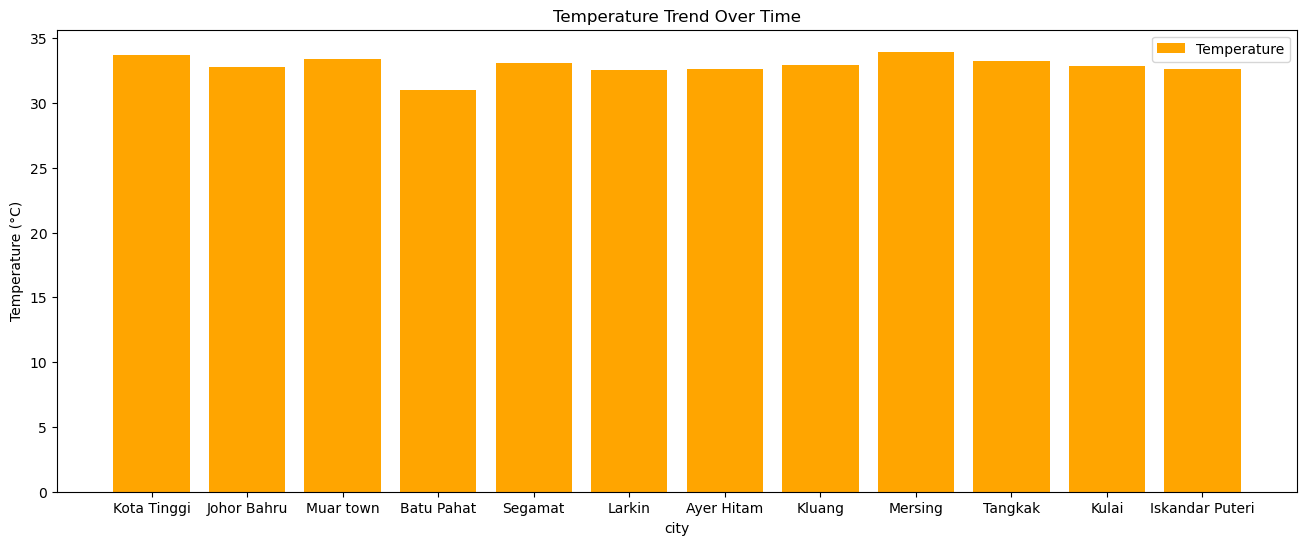

In [106]:
plt.figure(figsize=(16, 6))
plt.bar(df['city'], df['temperature'], label = 'Temperature', color = 'orange')
plt.xlabel('city')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
# plt.grid(True)
plt.show()